In [ ]:
# chia chuoi thanh cac tap xao tron
np.random.seed(42)
tf.random.set_seed(42)
n_steps = 5
dataset = tf.data.Dataset.from_tensor_slices(tf.range(15))
dataset = dataset.window(n_steps, shift = 2, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(n_steps))
dataset = dataset.shuffle(10).map(lambda window : (window[:-1], window[1:]))
dataset = dataset.batch(3).prefetch(1)
for index, (X_batch, Y_batch) in enumerate(dataset):
  print("_" * 20, 'Batch', index, '\nX_batch')
  print(X_batch.numpy())
  print('=' * 5, '\nY_batch')
  print(Y_batch.numpy())

____________________ Batch 0 
X_batch
[[6 7 8 9]
 [2 3 4 5]
 [4 5 6 7]]
===== 
Y_batch
[[ 7  8  9 10]
 [ 3  4  5  6]
 [ 5  6  7  8]]
____________________ Batch 1 
X_batch
[[ 0  1  2  3]
 [ 8  9 10 11]
 [10 11 12 13]]
===== 
Y_batch
[[ 1  2  3  4]
 [ 9 10 11 12]
 [11 12 13 14]]


In [ ]:
# tai du lieu va chuan bị du lieu
shakespeare_url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

1115394/1115394 [==============================] - 0s 0us/step


In [ ]:
print(shakespeare_text[:148])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?



In [ ]:
"".join(sorted(set(shakespeare_text.lower())))

"\n !$&',-.3:;?abcdefghijklmnopqrstuvwxyz"

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(shakespeare_text)


In [ ]:
tokenizer.texts_to_sequences(['First'])

[[20, 6, 9, 8, 3]]

In [ ]:
tokenizer.sequences_to_texts([[20, 6, 9, 8, 3]])

['f i r s t']

In [ ]:
max_id = len(tokenizer.word_index)
dataset_size = tokenizer.document_count

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if IS_COLAB:
    %pip install -q -U tensorflow-addons
    %pip install -q -U transformers

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "nlp"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text]))-1
train_size = dataset_size * 90 // 100
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

In [ ]:
n_steps = 100
window_length = n_steps+1
dataset = dataset.window(window_length, shift=1, drop_remainder = True)

In [ ]:
dataset = dataset.flat_map(lambda window : window.batch(window_length))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

batch_size = 32
dataset = dataset.shuffle(10000).batch(batch_size)
dataset = dataset.map(lambda windows :(windows[:, :-1], windows[:, 1:]))

In [ ]:
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch)
)

In [ ]:
dataset = dataset.prefetch(1)

In [ ]:
for X_batch, Y_batch in dataset.take(1):
  print(X_batch.shape, Y_batch.shape)

(32, 100, 39) (32, 100)


In [ ]:
# tao va huan luyen mo hinh
model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences = True, input_shape = [None, max_id],
                     dropout = 0.2, recurrent_dropout=0.2),
    keras.layers.GRU(128, return_sequences = True,
                     dropout = 0.2, recurrent_dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation = 'softmax'))
])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam')
history = model.fit(dataset, epochs = 20)

Epoch 1/20


KeyboardInterrupt: ignored

In [ ]:
# su dung mo hinh char-RNN
def preprocess(texts):
  X = np.array(tokenizer.text_to_sequences(texts)) - 1
  return tf.one_hot(X, max_id)

In [ ]:
X_new = preprocess('how are yo')
Y_pred = np.argmax(model(X_new), axis = -1)
tokenizer.sequences_to_texts(Y_pred + 1)[0][-1]

AttributeError: ignored

In [ ]:
# tao van ban shakespeare gia
tf.random.set_seed(42)
tf.random.categorical([[np.log(0.5), np.log(0.4), np.log(0.1)]], num_samples=40).numpy()

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0]])

In [ ]:
def next_char(text, temperature=1):
  X_new = preprocess([text])
  y_proba = model(X_new)[0, -1:, :]
  rescaled_logits = tf.math.log(y_proba) / temperature
  char_id = tf.random.categorical(rescaled_logits, num_sample=1) + 1
  return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [ ]:
def complete_text(text, n_chars=50, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [ ]:
tf.random.set_seed(42)
print(complete_text('t', temperature=0.2))
print(complete_text('t', temperature = 1))
print(complete_text('t', temperature = 2))

In [ ]:
# RNN trang thai
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])
dataset = dataset.window(window_length, shift=n_steps, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_length))
dataset = dataset.batch(1)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
dataset = dataset.prefetch(1)

In [ ]:
batch_size = 32
encoded_parts = np.array_split(encoded[:train_size], batch_size)
datasets = []
for encoded_part in encoded_parts:
    dataset = tf.data.Dataset.from_tensor_slices(encoded_part)
    dataset = dataset.window(window_length, shift=n_steps, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_length))
    datasets.append(dataset)
dataset = tf.data.Dataset.zip(tuple(datasets)).map(lambda *windows: tf.stack(windows))
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
dataset = dataset.prefetch(1)


In [ ]:
# huan luyen mo hinh mang
model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences=True, stateful=True,
                     #dropout=0.2, recurrent_dropout=0.2,
                     dropout=0.2,
                     batch_input_shape=[batch_size, None, max_id]),
    keras.layers.GRU(128, return_sequences=True, stateful=True,
                     #dropout=0.2, recurrent_dropout=0.2),
                     dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation="softmax"))
])

In [ ]:
# dat trang thai truoc khi quay dau van ban
class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam')
history = model.fit(dataset, epochs=50,
                    callbacks = [ResetStatesCallback()])

Epoch 1/50
313/313 [==============================] - 9s 16ms/step - loss: 2.6213
Epoch 2/50
313/313 [==============================] - 5s 15ms/step - loss: 2.2417
Epoch 3/50
313/313 [==============================] - 5s 17ms/step - loss: 2.1095
Epoch 4/50
313/313 [==============================] - 9s 28ms/step - loss: 2.0346
Epoch 5/50
313/313 [==============================] - 5s 17ms/step - loss: 1.9840
Epoch 6/50
313/313 [==============================] - 5s 15ms/step - loss: 1.9463
Epoch 7/50
313/313 [==============================] - 7s 21ms/step - loss: 1.9197
Epoch 8/50
313/313 [==============================] - 5s 15ms/step - loss: 1.8968
Epoch 9/50
313/313 [==============================] - 7s 22ms/step - loss: 1.8793
Epoch 10/50
313/313 [==============================] - 5s 15ms/step - loss: 1.8626
Epoch 11/50
313/313 [==============================] - 7s 21ms/step - loss: 1.8506
Epoch 12/50
313/313 [==============================] - 5s 15ms/step - loss: 1.8392
Epoch 13/50
3

In [ ]:
stateless_model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences = True, input_shape = [None, max_id]),
    keras.layers.GRU(128, return_sequences = True),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation = 'softmax'))
])

In [ ]:
# tao mo hinh de thiet lap trong so
stateless_model.build(tf.TensorShape([None, None, max_id]))

In [ ]:
stateless_model.set_weights(model.get_weights())
model = stateless_model

In [ ]:
tf.random.set_seed(42)
from keras.preprocessing.text import Tokenizer
print(complete_text('t'))

In [ ]:
# phan tich cam xuc
tf.random.set_seed(42)
# tai du lieu IMDB
(X_train, Y_train),(X_test, Y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
X_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [ ]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3: word for word, id_ in word_index.items()}
for id_, token in enumerate(('<pad>', '<sos>', '<unk>')):
  id_to_word[id_] = token
" ".join([id_to_word[id_] for id_ in X_train[0][:10]])

1641221/1641221 [==============================] - 0s 0us/step


'<sos> this film was just brilliant casting location scenery story'

In [ ]:
import tensorflow_datasets as tfds
datasets, info = tfds.load('imdb_reviews', as_supervised=True, with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOPAS8N/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOPAS8N/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOPAS8N/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
datasets.keys()

dict_keys([Split('train'), Split('test'), Split('unsupervised')])

In [ ]:
train_size = info.splits['train'].num_examples
test_size = info.splits['test'].num_examples

In [ ]:
print(train_size, test_size)

25000 25000


In [ ]:
for X_batch, y_batch in datasets['train'].batch(2).take(1):
  for review, label in zip(X_batch.numpy(), y_batch.numpy()):
    print('Review: ', review.decode('utf_8')[:200], '...')
    print('label:', label, '=Positive' if label else '=Negative')
    print()

Review:  This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting  ...
label: 0 =Negative

Review:  I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However  ...
label: 0 =Negative



In [ ]:
def preprocess(X_batch, y_batch):
  X_batch = tf.strings.substr(X_batch, 0, 300)
  X_batch = tf.strings.regex_replace(X_batch, rb"<br\s*/?>" , b" ")
  X_batch = tf.strings.regex_replace(X_batch, b"[^a-zA-Z']", b" ")
  X_batch = tf.strings.split(X_batch)
  return X_batch.to_tensor(default_value=b'<pad>'), y_batch


In [ ]:
preprocess(X_batch, y_batch)

(<tf.Tensor: shape=(2, 53), dtype=string, numpy=
 array([[b'This', b'was', b'an', b'absolutely', b'terrible', b'movie',
         b"Don't", b'be', b'lured', b'in', b'by', b'Christopher',
         b'Walken', b'or', b'Michael', b'Ironside', b'Both', b'are',
         b'great', b'actors', b'but', b'this', b'must', b'simply', b'be',
         b'their', b'worst', b'role', b'in', b'history', b'Even',
         b'their', b'great', b'acting', b'could', b'not', b'redeem',
         b'this', b"movie's", b'ridiculous', b'storyline', b'This',
         b'movie', b'is', b'an', b'early', b'nineties', b'US',
         b'propaganda', b'pi', b'<pad>', b'<pad>', b'<pad>'],
        [b'I', b'have', b'been', b'known', b'to', b'fall', b'asleep',
         b'during', b'films', b'but', b'this', b'is', b'usually', b'due',
         b'to', b'a', b'combination', b'of', b'things', b'including',
         b'really', b'tired', b'being', b'warm', b'and', b'comfortable',
         b'on', b'the', b'sette', b'and', b'having', b'j

In [ ]:
from collections import Counter
vocabulary = Counter()
for X_batch, y_batch in datasets['train'].batch(32).map(preprocess):
  for review in X_batch:
    vocabulary.update(list(review.numpy()))

In [ ]:
vocabulary.most_common()[:3]

[(b'<pad>', 214309), (b'the', 61137), (b'a', 38564)]

In [ ]:
print(len(vocabulary))

53893


In [ ]:
vocab_size = 10000
truncated_vocabulary = [
    word for word, count in vocabulary.most_common()[:vocab_size]
]

In [ ]:
word_to_id = {word : index for index, word in enumerate(truncated_vocabulary)}
for word in b'This movie was faaaaaaantastic'.split():
  print(word_to_id.get(word) or vocab_size)

22
12
11
10000


In [ ]:
words = tf.constant(truncated_vocabulary)
word_ids = tf.range(len(truncated_vocabulary), dtype = tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

In [ ]:
table.lookup(tf.constant([b'This movie was faaaaaantastic'.split()]))

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[   22,    12,    11, 10053]])>

In [ ]:
def encode_words(X_batch, y_batch):
  return table.lookup(X_batch), y_batch
train_set = datasets['train'].batch(32).map(preprocess)
train_set = train_set.map(encode_words).prefetch(1)

In [ ]:
for X_batch, y_batch in train_set.take(1):
  print(X_batch)
  print(y_batch)

tf.Tensor(
[[  22   11   28 ...    0    0    0]
 [   6   21   70 ...    0    0    0]
 [4099 6881    1 ...    0    0    0]
 ...
 [  22   12  118 ...  331 1047    0]
 [1757 4101  451 ...    0    0    0]
 [3365 4392    6 ...    0    0    0]], shape=(32, 60), dtype=int64)
tf.Tensor([0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0], shape=(32,), dtype=int64)


In [ ]:
embed_size  =128
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size,
                           mask_zero = True,
                           input_shape = [None]),
    keras.layers.GRU(128, return_sequences= True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(train_set, epochs = 5)

Epoch 1/5
782/782 [==============================] - 80s 80ms/step - loss: 0.5298 - accuracy: 0.7280
Epoch 2/5
782/782 [==============================] - 21s 26ms/step - loss: 0.3474 - accuracy: 0.8571
Epoch 3/5
782/782 [==============================] - 23s 29ms/step - loss: 0.1789 - accuracy: 0.9378
Epoch 4/5
782/782 [==============================] - 26s 33ms/step - loss: 0.1343 - accuracy: 0.9504
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.1145 - accuracy: 0.9576


In [ ]:
# tao mat la bang cach cay chay
K = keras.backend
embed_size = 128
inputs = keras.layers.Input(shape=[None])
mask  =keras.layers.Lambda(lambda inputs : K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs)
z = keras.layers.GRU(128, return_sequences = True)(z, mask = mask)
z = keras.layers.GRU(128)(z, mask = mask)
outputs = keras.layers.Dense(1, activation = 'sigmoid')(z)
model = keras.models.Model(inputs = [inputs], outputs = [outputs])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics  =['accuracy'])
history = model.fit(train_set, epochs = 5)

Epoch 1/5
782/782 [==============================] - 56s 51ms/step - loss: 0.5400 - accuracy: 0.7171
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 0.3445 - accuracy: 0.8582
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1819 - accuracy: 0.9353
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1302 - accuracy: 0.9516
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0989 - accuracy: 0.9642


In [ ]:
# tai su dung cac embedding tien huan luyen
tf.random.set_seed(42)
TFHUB_CACHE_DIR = os.path.join(os.curdir, 'my_tfhub_cache')
os.environ['TFHUB_CACHE_DIR'] = TFHUB_CACHE_DIR

In [ ]:
import tensorflow_hub as hub

model = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                   dtype = tf.string, input_shape = [], output_shape = [50]),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
for dirpath, dirnames, filenames in os.walk(TFHUB_CACHE_DIR):
  for filename in filenames:
    print(os.path.join(dirpath, filename))

./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe.descriptor.txt
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/saved_model.pb
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.index
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.data-00000-of-00001
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/assets/tokens.txt


In [ ]:
import tensorflow_datasets as tfds
datasets, info = tfds.load('imdb_reviews', as_supervised=True, with_info = True)
train_size = info.splits['train'].num_examples
batch_size = 32
train_set = datasets['train'].batch(batch_size).prefetch(1)
history = model.fit(train_set, epochs = 5)

Epoch 1/5
782/782 [==============================] - 7s 7ms/step - loss: 0.5451 - accuracy: 0.7274
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5137 - accuracy: 0.7488
Epoch 3/5
782/782 [==============================] - 6s 7ms/step - loss: 0.5087 - accuracy: 0.7533
Epoch 4/5
782/782 [==============================] - 6s 7ms/step - loss: 0.5054 - accuracy: 0.7554
Epoch 5/5
782/782 [==============================] - 8s 10ms/step - loss: 0.5027 - accuracy: 0.7572


In [ ]:

# dich tu dong
tf.random.set_seed(42)
vocab_size = 100
embed_size = 10
import tensorflow_addons as tfa

encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
sequence_lengths = keras.layers.Input(shape=[], dtype=np.int32)

embeddings = keras.layers.Embedding(vocab_size, embed_size)
encoder_embeddings = embeddings(encoder_inputs)
decoder_embeddings = embeddings(decoder_inputs)

encoder = keras.layers.LSTM(512, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_embeddings)
encoder_state = [state_h, state_c]

sampler = tfa.seq2seq.sampler.TrainingSampler()

decoder_cell = keras.layers.LSTMCell(512)
output_layer = keras.layers.Dense(vocab_size)
decoder = tfa.seq2seq.basic_decoder.BasicDecoder(decoder_cell, sampler,
                                                 output_layer=output_layer)
final_outputs, final_state, final_sequence_lengths = decoder(
    decoder_embeddings, initial_state=encoder_state,
    sequence_length=sequence_lengths)
Y_proba = tf.nn.softmax(final_outputs.rnn_output)

model = keras.models.Model(
    inputs=[encoder_inputs, decoder_inputs, sequence_lengths],
    outputs=[Y_proba])


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam')


In [ ]:
X = np.random.randint(100, size=10*1000).reshape(1000, 10)
Y = np.random.randint(100, size=15*1000).reshape(1000, 15)
X_decoder = np.c_[np.zeros((1000, 1)), Y[:, :-1]]
seq_lengths = np.full([1000], 15)

history = model.fit([X, X_decoder, seq_lengths], Y, epochs=2)

Epoch 1/2
32/32 [==============================] - 11s 90ms/step - loss: 4.6052
Epoch 2/2
32/32 [==============================] - 4s 116ms/step - loss: 4.6037


In [ ]:
# cac tang hoi tiep hai chieu
model = keras.models.Sequential([
    keras.layers.GRU(10, return_sequences = True, input_shape = [None, 10]),
    keras.layers.Bidirectional(keras.layers.GRU(10, return_sequences=True))
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, None, 10)          660       
                                                                 
 bidirectional (Bidirection  (None, None, 20)          1320      
 al)                                                             
                                                                 
Total params: 1980 (7.73 KB)
Trainable params: 1980 (7.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class PositionalEncoding(keras.layers.Layer):
    def __init__(self, max_steps, max_dims, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        if max_dims % 2 == 1: max_dims += 1 # max_dims must be even
        p, i = np.meshgrid(np.arange(max_steps), np.arange(max_dims // 2))
        pos_emb = np.empty((1, max_steps, max_dims))
        pos_emb[0, :, ::2] = np.sin(p / 10000**(2 * i / max_dims)).T
        pos_emb[0, :, 1::2] = np.cos(p / 10000**(2 * i / max_dims)).T
        self.positional_embedding = tf.constant(pos_emb.astype(self.dtype))
    def call(self, inputs):
        shape = tf.shape(inputs)
        return inputs + self.positional_embedding[:, :shape[-2], :shape[-1]]

In [ ]:
max_steps = 201
max_dims = 512
pos_emb = PositionalEncoding(max_steps, max_dims)
PE = pos_emb(np.zeros((1, max_steps, max_dims), np.float32))[0].numpy()

Saving figure positional_embedding_plot


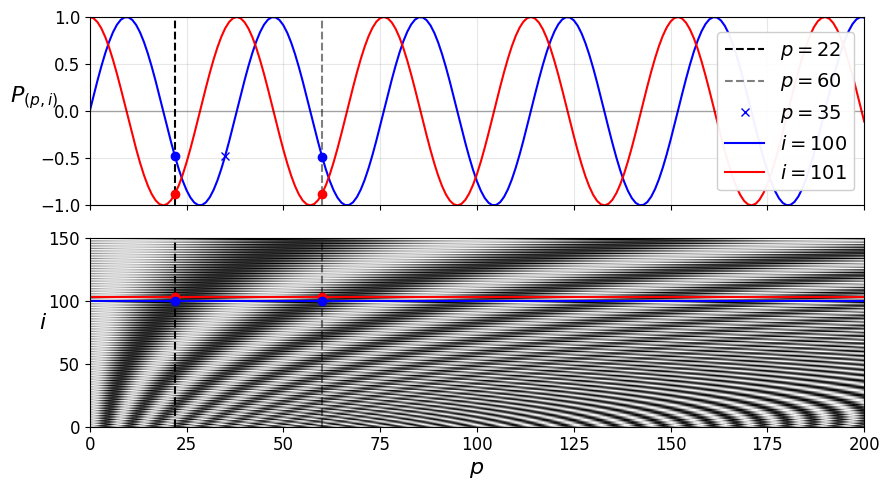

In [ ]:
i1, i2, crop_i = 100, 101, 150
p1, p2, p3 = 22, 60, 35
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 5))
ax1.plot([p1, p1], [-1, 1], "k--", label="$p = {}$".format(p1))
ax1.plot([p2, p2], [-1, 1], "k--", label="$p = {}$".format(p2), alpha=0.5)
ax1.plot(p3, PE[p3, i1], "bx", label="$p = {}$".format(p3))
ax1.plot(PE[:,i1], "b-", label="$i = {}$".format(i1))
ax1.plot(PE[:,i2], "r-", label="$i = {}$".format(i2))
ax1.plot([p1, p2], [PE[p1, i1], PE[p2, i1]], "bo")
ax1.plot([p1, p2], [PE[p1, i2], PE[p2, i2]], "ro")
ax1.legend(loc="center right", fontsize=14, framealpha=0.95)
ax1.set_ylabel("$P_{(p,i)}$", rotation=0, fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.hlines(0, 0, max_steps - 1, color="k", linewidth=1, alpha=0.3)
ax1.axis([0, max_steps - 1, -1, 1])
ax2.imshow(PE.T[:crop_i], cmap="gray", interpolation="bilinear", aspect="auto")
ax2.hlines(i1, 0, max_steps - 1, color="b")
cheat = 2 # need to raise the red line a bit, or else it hides the blue one
ax2.hlines(i2+cheat, 0, max_steps - 1, color="r")
ax2.plot([p1, p1], [0, crop_i], "k--")
ax2.plot([p2, p2], [0, crop_i], "k--", alpha=0.5)
ax2.plot([p1, p2], [i2+cheat, i2+cheat], "ro")
ax2.plot([p1, p2], [i1, i1], "bo")
ax2.axis([0, max_steps - 1, 0, crop_i])
ax2.set_xlabel("$p$", fontsize=16)
ax2.set_ylabel("$i$", rotation=0, fontsize=16)
save_fig("positional_embedding_plot")
plt.show()

In [ ]:
embed_size = 512; max_steps = 500; vocab_size = 10000
encoder_inputs = keras.layers.Input(shape = [None], dtype = np.int32)
decoder_inputs = keras.layers.Input(shape = [None], dtype = np.int32)
embeddings = keras.layers.Embedding(vocab_size, embed_size)
encoder_embeddings = embeddings(encoder_inputs)
decoder_embeddings = embeddings(decoder_inputs)
positional_encoding = PositionalEncoding(max_steps, max_dims=embed_size)
encoder_in = positional_encoding(encoder_embeddings)
decoder_in = positional_encoding(decoder_embeddings)

In [ ]:
Z = encoder_in
for N in range(6):
  Z = keras.layers.Attention(use_scale=True)([Z, Z])

encoder_outputs = Z
Z = decoder_in
for N in range(6):
  Z = keras.layers.Attention(use_scale=True, causal = True)([Z, Z])
  Z = keras.layers.Attention(use_scale = True)([Z, encoder_outputs])

outputs = keras.layers.TimeDistributed(
    keras.layers.Dense(vocab_size, activation = 'softmax'))(Z)

In [ ]:
import tensorflow.keras as keras
K = keras.backend

class MultiHeadAttention(keras.layers.Layer):
    def __init__(self, n_heads, causal=False, use_scale=False, **kwargs):
        self.n_heads = n_heads
        self.causal = causal
        self.use_scale = use_scale
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.dims = batch_input_shape[0][-1]
        self.q_dims, self.v_dims, self.k_dims = [self.dims // self.n_heads] * 3 # could be hyperparameters instead
        self.q_linear = keras.layers.Conv1D(self.n_heads * self.q_dims, kernel_size=1, use_bias=False)
        self.v_linear = keras.layers.Conv1D(self.n_heads * self.v_dims, kernel_size=1, use_bias=False)
        self.k_linear = keras.layers.Conv1D(self.n_heads * self.k_dims, kernel_size=1, use_bias=False)
        self.attention = keras.layers.Attention(causal=self.causal, use_scale=self.use_scale)
        self.out_linear = keras.layers.Conv1D(self.dims, kernel_size=1, use_bias=False)
        super().build(batch_input_shape)
    def _multi_head_linear(self, inputs, linear):
        shape = K.concatenate([K.shape(inputs)[:-1], [self.n_heads, -1]])
        projected = K.reshape(linear(inputs), shape)
        perm = K.permute_dimensions(projected, [0, 2, 1, 3])
        return K.reshape(perm, [shape[0] * self.n_heads, shape[1], -1])
    def call(self, inputs):
        q = inputs[0]
        v = inputs[1]
        k = inputs[2] if len(inputs) > 2 else v
        shape = K.shape(q)
        q_proj = self._multi_head_linear(q, self.q_linear)
        v_proj = self._multi_head_linear(v, self.v_linear)
        k_proj = self._multi_head_linear(k, self.k_linear)
        multi_attended = self.attention([q_proj, v_proj, k_proj])
        shape_attended = K.shape(multi_attended)
        reshaped_attended = K.reshape(multi_attended, [shape[0], self.n_heads, shape_attended[1], shape_attended[2]])
        perm = K.permute_dimensions(reshaped_attended, [0, 2, 1, 3])
        concat = K.reshape(perm, [shape[0], shape_attended[1], -1])
        return self.out_linear(concat)
